## Logistic Regression 

Update equation for Binary Logistic Regression:

$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\sum_{i=1}^M (y^{(i)}-g(x^{(i)}))x^{(i)}_j}_{\text{gradient}} $$

**Where:**

- η: learning rate
- g(⋅): sigmoid function
- $y^{(i)}$: instance of the target
- $ŷ^{(i)}$: an instance of the prediction (for the current value of w)
- $x_{j}^{(i)}$ is the $i^{th}$ instance of the input with the $j^{th}$ feature (that is, the feature in row i and column j)


Note: The logistic regression equation maps the input to an output ranging between 0 and 1. The sigmoid activation directly regresses the logistic function (i.e. sigmoid) for the probability $y=1$. Thus:

$$ p(y^{(i)}=1\text{ | }x^{(i)},w)=\frac{1}{1+\exp{(w^T x^{(i)}})}$$

The dot product of $w^T x^{(i)}$ results in a scalar. Multiplying $w$ and $x^{(i)}$ together returns a single value. Next, place the single value through the sigmoid activation function to compute the probability that $y=1$. 

$$ \hat{y}^{(i)} = 1$$
$$\text{if:    } p(y^{(i)}=1\text{ | }x^{(i)},w) > 0.5  $$ 
and 
$$ \hat{y}^{(i)} = 0  \text{      otherwise} $$

In [278]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [363]:
class Logistic_Regression(object):
    
    """Logistic Regression
    
    
    Keyword arguments:
    eta -- Learning rate (between 0.0 and 1.0)
    n_iter -- Number of passes over the training set
    """
    
    def __init__(self,lr,iterations=20):
        self.learning_rate = lr
        self.iters = iterations
    
    def sigmoid(self,X):
        
        """ Logistic Sigmoid Activation Function """
        
        z = self.net_input(X)
        sigmoid = 1 / (1+np.exp(-z))
        return(sigmoid)
    
    def net_input(self,X):
        
        """ Z = W^T dot X"""
        
        z = np.dot(X,self.weights[1:] + self.weights[0])
        return(z)
    
    def fit(self,X,y):
        
        #Initialize Weights
        self.weights = np.zeros(1+X.shape[1])
        
        #Store Gradients
        self.cost = []
     
        for i in range(self.iters):
            net_input = self.net_input(X)
            out = self.sigmoid(X)
            error = (y - yhat)

            self.weights[1:] += self.learning_rate * X.T.dot(error)
            self.weights[0] += self.learning_rate * error.sum()
            
            cost = -y.dot(np.log(out)) - ((1 - y).dot(np.log(1 - out)))
            self.cost.append(cost)
        return self
            
    def predict(self,X):
        pred = np.where(self.sigmoid(X) >= 0.50,1,0)
        return(pred)
    
    def cost_plot(self):
        plt.figure(figsize=(8,4))
        plt.plot(range(1, len(self.cost) + 1), self.cost, marker='o',lw=.5)
        plt.xlabel('Epochs',fontsize=14)
        plt.ylabel('Logistic Cost',fontsize=14)
        plt.title('Cost vs Epochs',fontsize=16,y=1.02)

In [364]:
def get_data():
    
    """ Load Data -- Iris Dataset"""
    
    X = pd.DataFrame(datasets.load_iris().data,columns=[datasets.load_iris().feature_names])
    y = pd.DataFrame(datasets.load_iris().target,columns=['Species'])

    concat = pd.concat([X,y],axis=1)
    concat = concat[concat['Species'] <= 1].reset_index(drop=True)
    X = concat.ix[:,:-1]
    y = concat.ix[:,-1]

    #Standardize Date
    for c in X.columns:
        X[c]  = StandardScaler().fit_transform(X[c].reshape(-1,1))
    return(X,y)

Accuracy Score: 1.0


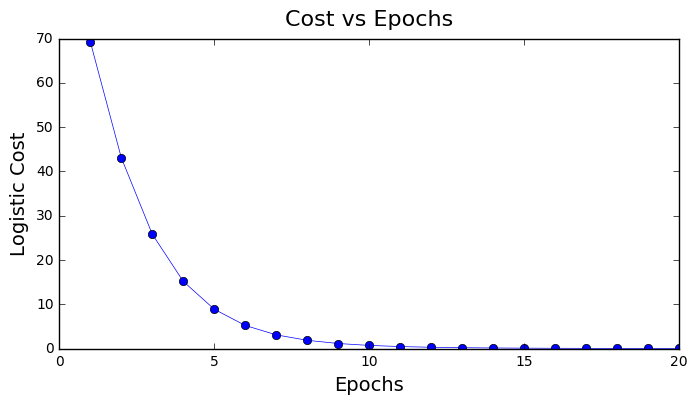

In [365]:
if __name__ == '__main__':
    
    #Get Data
    X,y = get_data()
    
    #Instantiate Logistic Regression Classifier
    clf = Logistic_Regression(lr=0.10)
    
    #Fit Model w/ Training Data
    clf.fit(X, y)
    
    #Make Predictions
    yhat = clf.predict(X)
    
    #Accuracy Score
    print('Accuracy Score: {}'.format(accuracy_score(yhat,y)))
    
    clf.cost_plot()